# Meta-Data - Study I
## Imports

In [2]:
# load dependencies
import seaborn as sns
import StudyI_Pentatonic_vs_Chromatic.paths as StudyI_paths
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load data
studyI_GL = pd.read_pickle(StudyI_paths.processed_dir + StudyI_paths.post_exclusion_data_pickle_filename) # Study I: Post-exclusion group-level data

## Plots
### Number of subjects per any given melody length

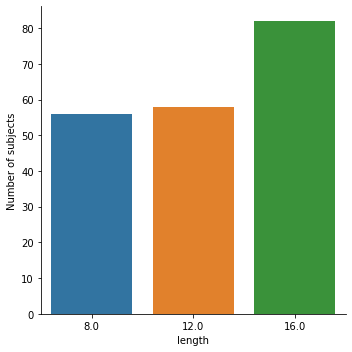

In [4]:
temp = studyI_GL.groupby(['length']).count().reset_index()
temp = temp.rename(columns={'subject':'Number of subjects'})
sns.catplot(y="Number of subjects", x="length", kind="bar", data=temp)
plt.savefig(StudyI_paths.plots_dir + "subjects_per_set.svg")

### Distribution of button presses
1st - left button
neither - middle button
2nd - right button

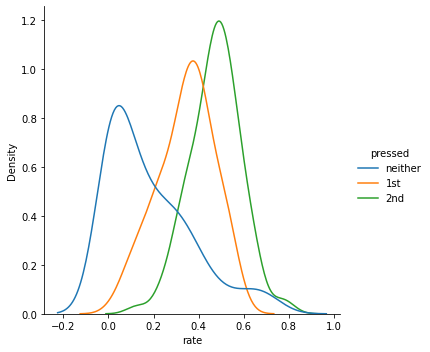

In [5]:
# Study I: Distribution of button presses
temp = studyI_GL[['subject', 'rate pressed neither (task)','rate pressed 1st (task)','rate pressed 2nd (task)']]
temp = temp.rename(columns={'rate pressed neither (task)':'neither','rate pressed 1st (task)':'1st','rate pressed 2nd (task)':'2nd'})
temp = temp.groupby('subject').mean().stack().reset_index()
temp = temp.rename(columns={'level_1':'pressed',0:'rate'})
sns.displot(data=temp, x="rate", hue="pressed",kind='kde')
plt.savefig(StudyI_paths.plots_dir + "dist_of_buttons.svg")

### Distribution of amount of "neither" presses across the task


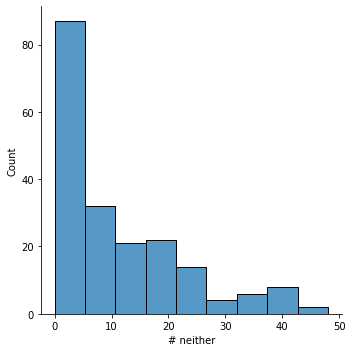

In [6]:
sns.displot(data=studyI_GL, x="# neither")
plt.savefig(StudyI_paths.plots_dir + "dist_of_neithers.svg")